In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

In [3]:
df=pd.read_csv('C:/Users/Pavan T S/Downloads/College_Placement_Prediction/dataset.csv')
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSLC_Marks,PUC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSLC_Marks                 10000 non-null  int64  
 10  PUC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
#removing un-necessary column
df=df.drop(columns='StudentID')
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSLC_Marks,PUC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


Text(0.5, 1.0, 'Placement Distribution')

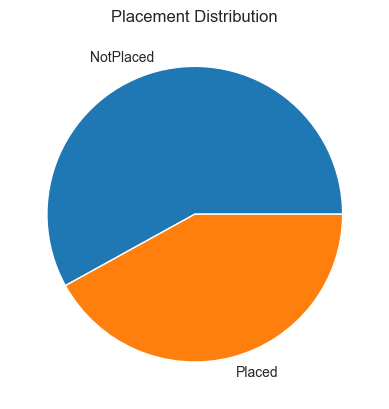

In [6]:
df.groupby('PlacementStatus').size().plot(kind='pie')
plt.title('Placement Distribution')

In [7]:
#replacing yes/no with boolean value 0/1
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
object_cols = df.select_dtypes(include=['object']).columns
for column in object_cols:
    df[column]=labelencoder.fit_transform(df[column])
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSLC_Marks,PUC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,8.9,0,3,2,87,4.8,1,1,71,85,1


In [8]:
df.isnull().sum() # for checking nulls

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSLC_Marks                   0
PUC_Marks                    0
PlacementStatus              0
dtype: int64

In [9]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSLC_Marks,PUC_Marks,PlacementStatus
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,0.585400,0.731800,69.159400,74.501500,0.419700
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,0.492677,0.443044,10.430459,8.919527,0.493534
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,0.000000,0.000000,55.000000,57.000000,0.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,0.000000,0.000000,59.000000,67.000000,0.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,1.000000,1.000000,70.000000,73.000000,0.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,1.000000,1.000000,78.000000,83.000000,1.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,1.000000,1.000000,90.000000,88.000000,1.000000


In [10]:
# Visualizating effect of internships on placement
Internships_effect = df.pivot_table(index = 'PlacementStatus',values="CGPA", columns='Internships', aggfunc='count')
Internships_effect

Internships,0,1,2
PlacementStatus,,,
0,1320,3733,750
1,663,1809,1725


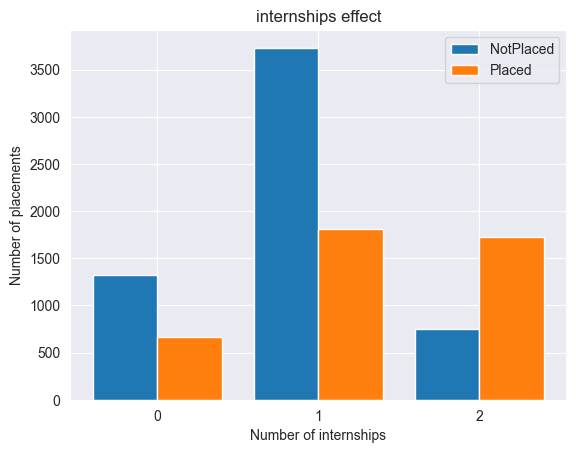

In [11]:
X = Internships_effect.columns
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Internships_effect.iloc[0,:], 0.4, label = 'NotPlaced')
plt.bar(X_axis + 0.2, Internships_effect.iloc[1,:], 0.4, label = 'Placed')

plt.xticks(X_axis, X)
plt.xlabel("Number of internships")
plt.ylabel("Number of placements")
plt.title("internships effect")
plt.legend()
plt.show()

In [12]:
# Effect of CGPA and softskills
CGPA_effect = df.pivot_table(index = 'PlacementStatus', values= ['CGPA', 'SoftSkillsRating'])
CGPA_effect
# Shows that higher cgpa and softskillSSLCore are more probable to land student a placement

,CGPA,SoftSkillsRating
PlacementStatus,,
0,7.467672,4.174393
1,8.016488,4.530760


<Axes: >

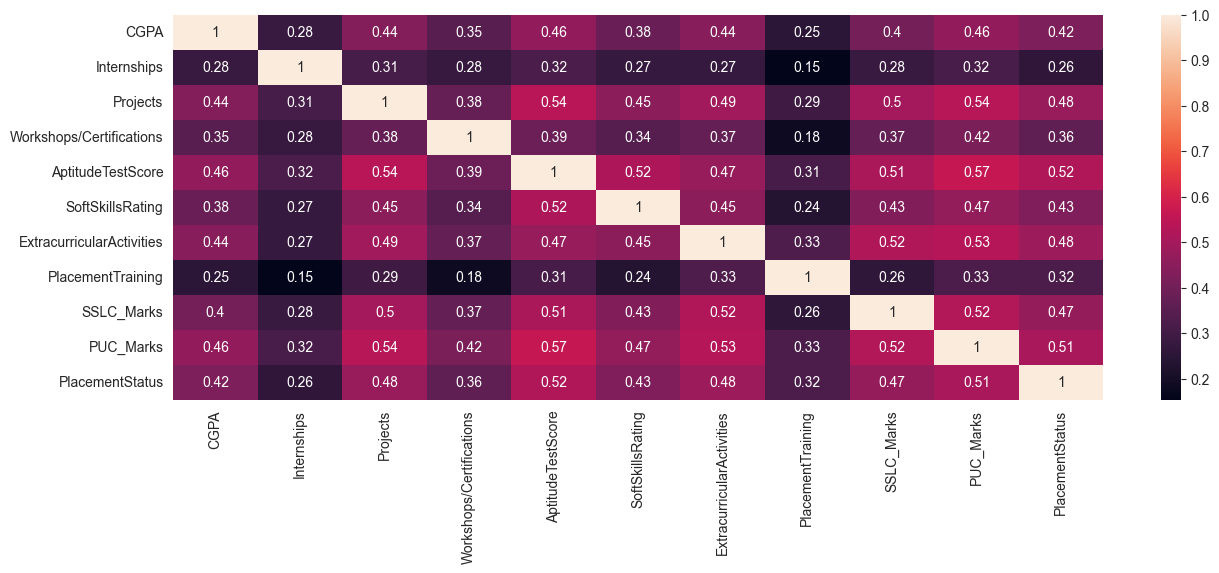

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)

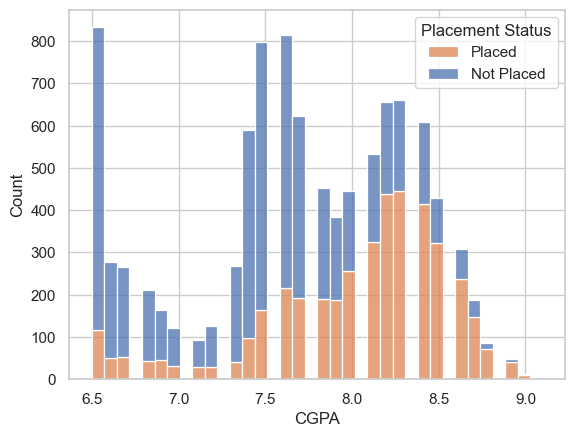

In [14]:
sns.set(style='whitegrid')
sns.histplot(data=df, x='CGPA', hue='PlacementStatus', multiple='stack')
plt.legend(title='Placement Status', labels=['Placed', 'Not Placed'])

Text(0.5, 1.0, 'CGPA Analysis')

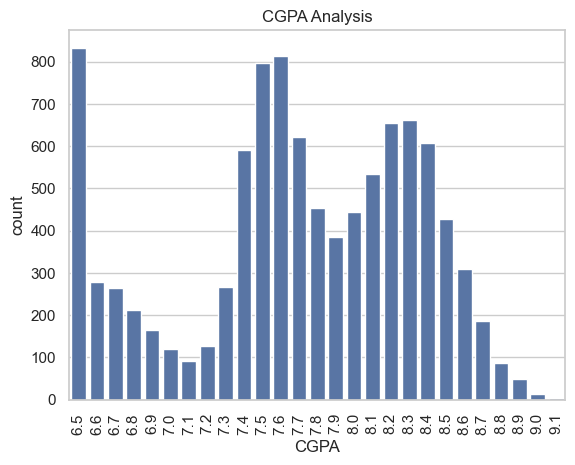

In [15]:
sns.countplot(data=df,x='CGPA')
plt.xticks(rotation=90)
plt.title('CGPA Analysis')

Text(0.5, 1.0, 'CGPA wise Placement')

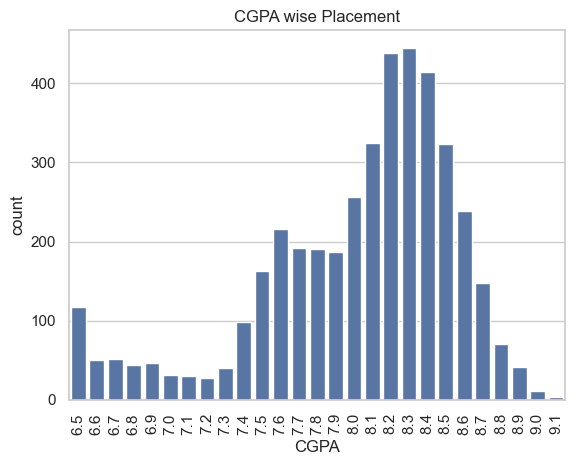

In [16]:
sns.countplot(data=df.loc[(df.PlacementStatus==1)],x='CGPA')
plt.xticks(rotation=90)
plt.title('CGPA wise Placement')

Text(0.5, 1.0, 'High School Marks')

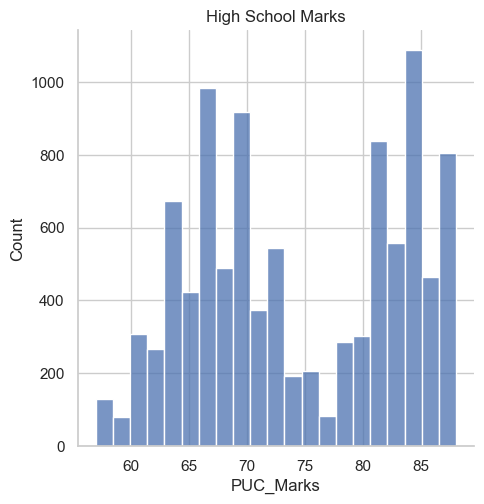

In [17]:
sns.displot(df['PUC_Marks'])
plt.title('High School Marks')

Text(0.5, 1.0, 'High School Marks wise Placement')

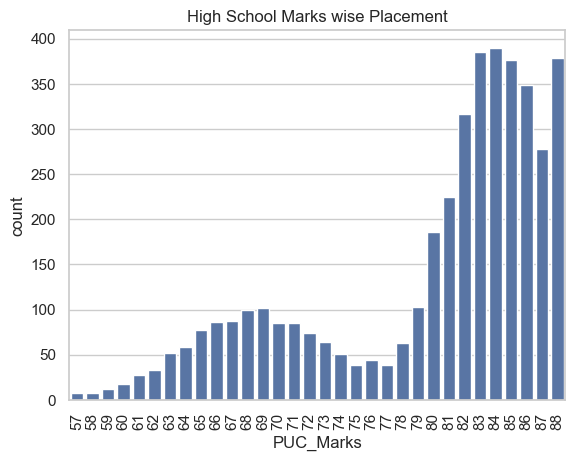

In [18]:
sns.countplot(data=df.loc[(df.PlacementStatus==1)],x='PUC_Marks')
plt.xticks(rotation=90)
plt.title('High School Marks wise Placement')

Text(0.5, 1.0, 'ExtracurricularActivities wise Placement')

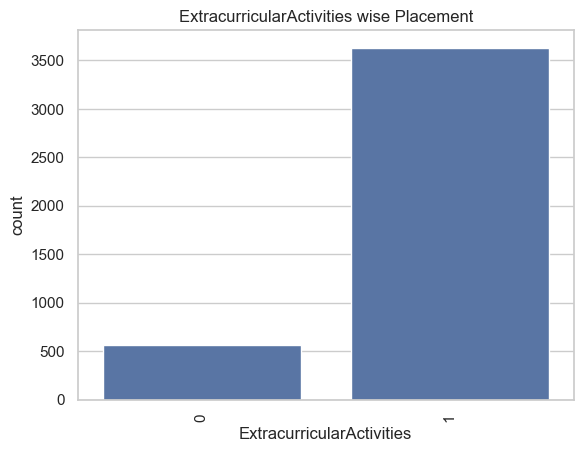

In [19]:
sns.countplot(data=df.loc[(df.PlacementStatus==1)],x='ExtracurricularActivities')
plt.xticks(rotation=90)
plt.title('ExtracurricularActivities wise Placement')

Text(0.5, 1.0, 'Softskills wise Placement')

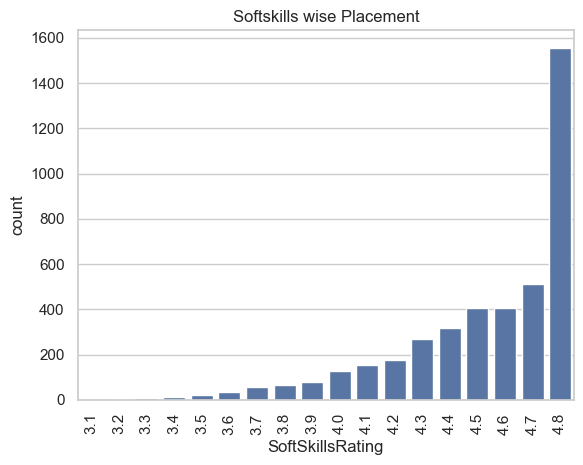

In [20]:
sns.countplot(data=df.loc[(df.PlacementStatus==1)],x='SoftSkillsRating')
plt.xticks(rotation=90)
plt.title('Softskills wise Placement')

Text(0.5, 1.0, 'Projects wise Placement')

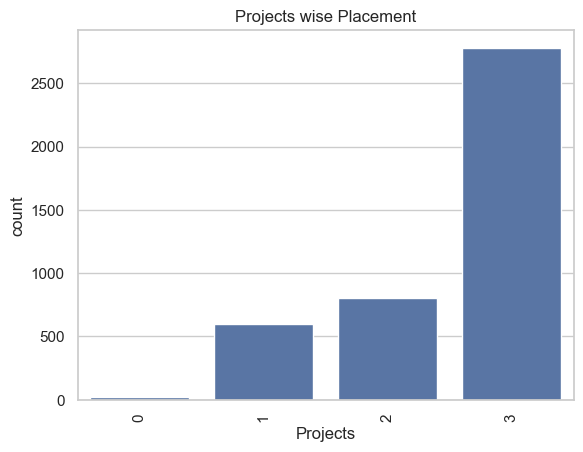

In [21]:
sns.countplot(data=df.loc[(df.PlacementStatus==1)],x='Projects')
plt.xticks(rotation=90)
plt.title('Projects wise Placement')

Text(0.5, 1.0, 'AptitudeTestScore wise Placement')

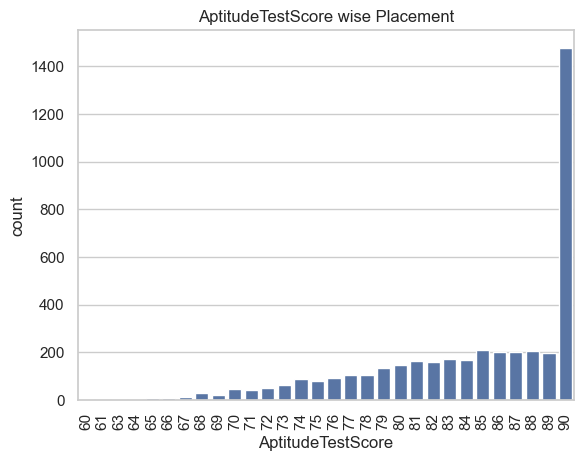

In [22]:
sns.countplot(data=df.loc[(df.PlacementStatus==1)],x='AptitudeTestScore')
plt.xticks(rotation=90)
plt.title('AptitudeTestScore wise Placement')

In [23]:
X=df.drop(columns='PlacementStatus')   #all columns except placement status
y=df.PlacementStatus          #placement status

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# XGBoost model

XGBoost Accuracy: 0.795


Text(0.5, 1.0, 'XGBoost Model')

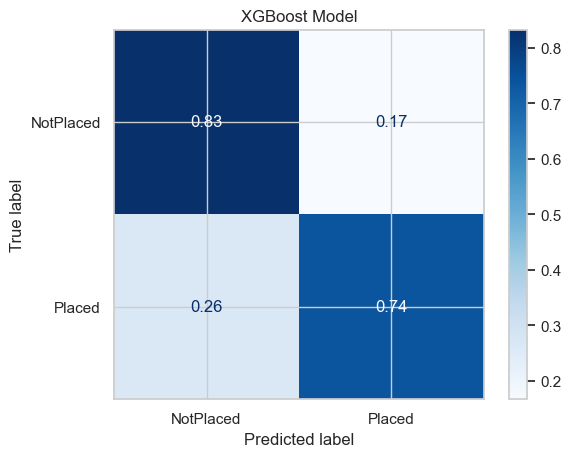

In [25]:
# Create a list to store accuracies
accuracies = []

# Create XGBoost model
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, objective="binary:logistic", eval_metric="logloss", random_state=1)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
accuracies.append({'Model': 'XGBoost', 'Accuracy': accuracy_xgb})

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb, normalize='true')
target_names = ['NotPlaced', 'Placed']

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names).plot(cmap='Blues')
plt.title('XGBoost Model') 

# Logistic Regression

Logistic Regression Accuracy: 0.808
              precision    recall  f1-score   support

   NotPlaced       0.84      0.83      0.84      1192
      Placed       0.76      0.77      0.76       808

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



Text(0.5, 1.0, 'Logistic Regression')

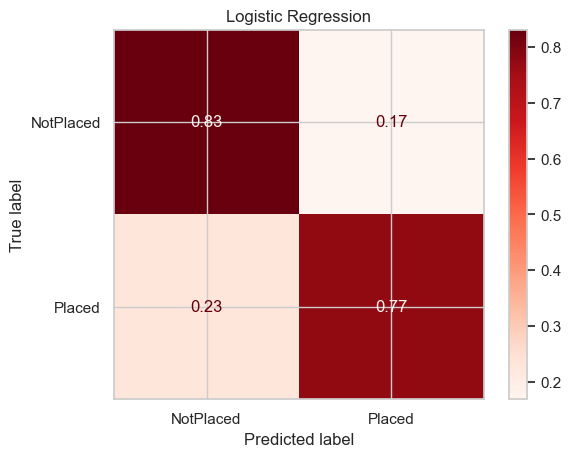

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
lr=LogisticRegression(max_iter=50000,penalty=None)
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)
accuracy = accuracy_score(prediction, y_test)
print(f"Logistic Regression Accuracy: {accuracy}")
accuracies.append({'Model': 'Logistic Regression', 'Accuracy': accuracy})

target_names=['NotPlaced','Placed']
print(classification_report(y_test,prediction,target_names=target_names))
cm=confusion_matrix(y_test,prediction,normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names).plot(cmap='Reds')
plt.title('Logistic Regression')

# Decision Tree model

Decision Tree Accuracy: 0.7045


Text(0.5, 1.0, 'Decision Tree')

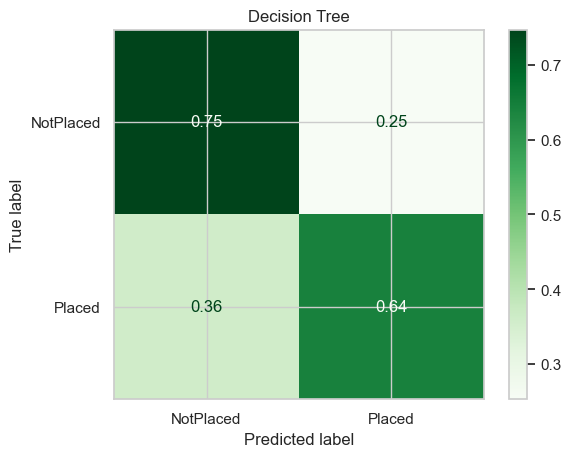

In [27]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=1)

# Fit the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
accuracies.append({'Model': 'Decision Tree', 'Accuracy': accuracy_dt})


# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, normalize='true')

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=target_names).plot(cmap='Greens')
plt.title('Decision Tree')

# Naive Bayes model

Naive Bayes Accuracy: 0.8075


Text(0.5, 1.0, 'Naive Bayes')

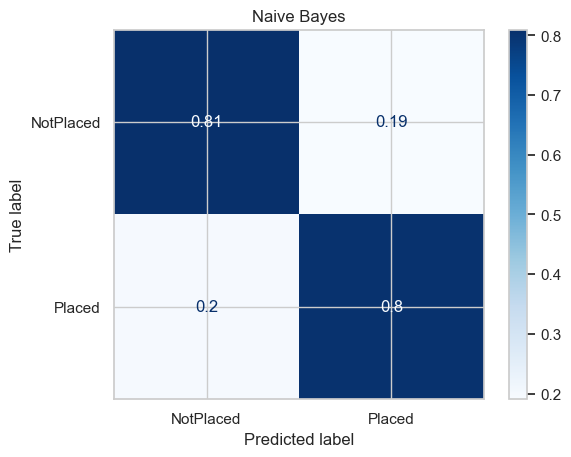

In [28]:
# Create Naive Bayes model (Gaussian Naive Bayes)
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
accuracies.append({'Model': 'Naive Bayes', 'Accuracy': accuracy_nb})

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, normalize='true')

# Display the confusion matrix

ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=target_names).plot(cmap='Blues')
plt.title('Naive Bayes')

# Support vector machines (SVM)

SVM Accuracy: 0.8105


Text(0.5, 1.0, 'SVM')

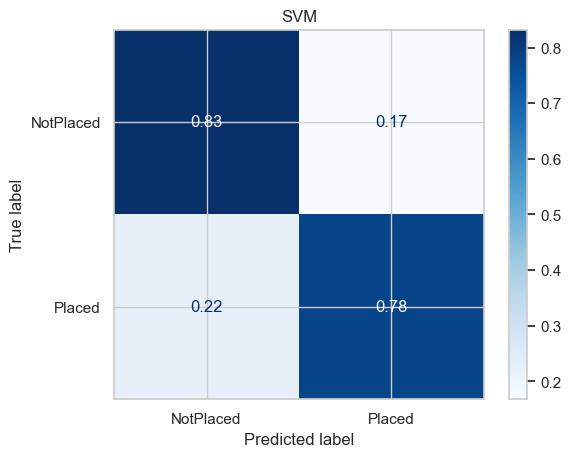

In [29]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=1)

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
#svm best in case of overfitting model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
accuracies.append({'Model': 'Support Vector Machine', 'Accuracy': accuracy_svm})
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, normalize='true')

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=target_names).plot(cmap='Blues')
plt.title('SVM')

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you have models named cgb_model, lr_model, dt_model, nb_model, svm_model, lgb_model
models = {'XG-Boost': xgb_model, 'Logistic Regression': lr, 'Decision Trees': dt_model, 'Naive Bayes': nb_model, 'SVM': svm_model}

# Create a list to store accuracies
accuracies = []

# Iterate over models
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
      # Precision, Recall, F1 Score, Specificity
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Append metrics to the accuracies list
    accuracies.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': specificity
    })

In [31]:
from termcolor import colored  # Add this import statement

accuracy_df = pd.DataFrame(accuracies)

# Remove duplicate rows based on the 'Model' column
accuracy_df = accuracy_df.drop_duplicates(subset='Model', keep='first')

# Display the accuracies in a beautified and colored tabular form
headers = accuracy_df.columns
data = accuracy_df.values  # Make sure 'data' is defined here

colored_table = [[colored(cell, 'blue', attrs=['bold']) if i == 0 else cell for i, cell in enumerate(row)] for row in data]
print(tabulate(colored_table, headers=headers, tablefmt='fancy_grid', showindex=False))

# Define the input features in the same order as the model was trained
feature_names = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore',
                 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSLC_Marks', 'PUC_Marks']

# Function to get input from the user
def get_user_input():
    user_input = []
    for feature in feature_names:
        value = float(input(f"Enter {feature}: "))
        user_input.append(value)
    return np.array(user_input).reshape(1, -1)

# Get user input
user_data = get_user_input()

# Make prediction
placement_prediction = svm_model.predict(user_data)

# Print the prediction
if placement_prediction[0] == 1:
    print("The model predicts that the student will be placed.")
else:
    print("The model predicts that the student will not be placed.")

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1 Score │   Specificity │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════════╡
│ XG-Boost            │     0.795  │    0.75     │ 0.738861 │   0.744389 │      0.831376 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Logistic Regression │     0.808  │    0.756659 │ 0.773515 │   0.764994 │      0.831376 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Decision Trees      │     0.7045 │    0.632156 │ 0.642327 │   0.637201 │      0.831376 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤
│ Naive Bayes         │     0.8075 │    0.741163 │ 0.804455 │   0.771513 │      0.831376 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────────┤

C:\Users\Pavan T S\PycharmProjects\pythonProject\ML_VirtualEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [32]:
import pickle
# output = open('data.pkl', 'wb')
# Pickle dictionary using protocol 0.
filename = 'savedmodel.sav'
pickle.dump(svm_model, open(filename,'wb'))

In [33]:
load_model = pickle.load(open(filename,'rb'))
load_model.predict([[8.9,0,3,2,90,4.0,1,1,78,82]])

C:\Users\Pavan T S\PycharmProjects\pythonProject\ML_VirtualEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

[LightGBM] [Info] Number of positive: 2945, number of negative: 4055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.420714 -> initscore=-0.319842
[LightGBM] [Info] Start training from score -0.319842


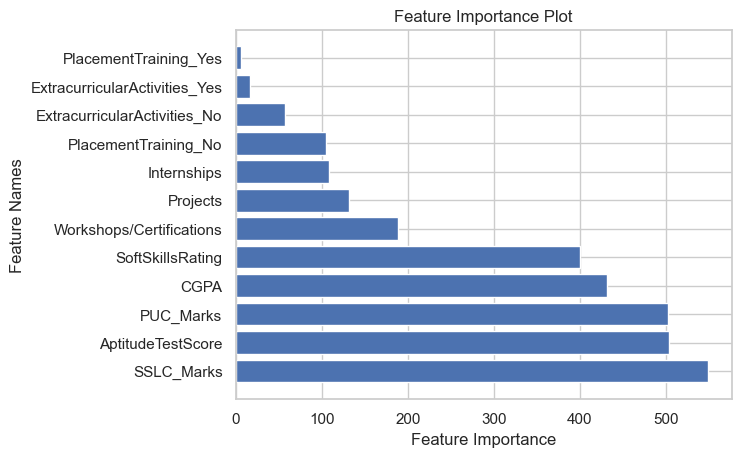

In [35]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load your dataset
df=pd.read_csv('C:/Users/Pavan T S/Downloads/College_Placement_Prediction/dataset.csv')

# Preprocess your data: Convert categorical variables to one-hot encoding
categorical_cols = ['ExtracurricularActivities', 'PlacementTraining']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Define features (X) and target variable (y)
X = df_encoded[['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSLC_Marks', 'PUC_Marks',
                'ExtracurricularActivities_No', 'ExtracurricularActivities_Yes', 'PlacementTraining_No', 'PlacementTraining_Yes']]
y = df_encoded['PlacementStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create and train the LightGBM model
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

# Access feature importance
feature_importance = clf.feature_importances_

# Map feature importance to feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort and visualize feature importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Plotting
features, importance = zip(*sorted_feature_importance)
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Plot')
plt.show()
